# 置信区间 Confidence Intervals


## 从抽样分布到置信区间 

我们可以使用自助法和抽样分布，构建感兴趣参数的置信区间。 

通过找出对感兴趣参数进行最好估计的统计量 (例如样本平均数估算总体平均数或样本平均数的差异估算总体平均数的差异)，我们可以很容易构建感兴趣参数的置信区间。 


## 抽样分布与置信区间 
 

在这个视频中，你学习如何使用样本量抽样分布构建置信区间的例子，这个样本量可以最好地估计你感兴趣的参数。在这个例子中，我们使用样本平均高度，估算总体平均高度。 

你可以将置信区间理解为 可信度为 95% ，总体平均数 落在你发现的范围内 。 注意根据构建置信区间的目的和每端删除的百分比，百分比和参数都会发生变化。

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.pcbtktxqe1s.png)

# 建立置信区间 - 总体平均数的置信区间 

在之前的视频中，你看到我们如何构建总体平均数的置信区间。为了进行一些练习，你可以采用同样的过程，创建不喝咖啡总体平均高度的置信区间。另外，python notebook 中有一些测试问题，可以确保你结果的准确性。 

### 置信区间 - 第一部分

首先让我们导入必要的库和数据集。

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

coffee_full = pd.read_csv('datasets/coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

`1.` 样本中喝咖啡的人的比例是多少？不喝咖啡的人的比例是多少？

`2.` 在喝咖啡的人中，他们的平均身高是多少？在不喝咖啡的人中，他们的平均身高是多少？

`3.` 模拟来自200个原始样本的200个“新”个体。在该有放回抽样样本（bootstrap sample）中，喝咖啡的人的比例是多少？不喝咖啡的人的比例是多少？

`4.` 现在模拟10,000次有放回抽样，并取每个样本中不喝咖啡的人的平均身高。每个有放回抽样样本应该是从200个数据点中取出的第一个样本。绘制分布图，并拉出95％置信区间所需的值。在这个例子中，关于平均数的抽样分布，你发现了什么？

`5.`  你的区间是否记录了人群中不喝咖啡的人的实际平均身高？看一看人口中的平均数和95％置信区间提供的两个界限，然后回答下面的最后一个测试题目。

In [25]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [27]:
coffee_red.shape

(200, 4)

In [28]:
coffee_full.shape

(2974, 4)

In [29]:
coffee_full['drinks_coffee'].mean()

0.589778076664425

In [35]:
coffee_red['drinks_coffee'].mean()

0.595

In [39]:
1- coffee_red['drinks_coffee'].mean()

0.405

In [31]:
coffee_red.query('drinks_coffee == True')['height'].mean()

68.11962990858618

In [32]:
coffee_red.query('drinks_coffee == False')['height'].mean()

66.78492279927877

In [4]:
coffee_red_2 = coffee_full.sample(200)
coffee_red_2.head()

,user_id,age,drinks_coffee,height
469,6051,>=21,True,68.717822
2635,3405,>=21,True,69.015309
1898,7983,<21,False,66.418863
2795,6606,>=21,True,69.914371
167,4610,>=21,True,66.670203


In [5]:
coffee_red_2['drinks_coffee'].mean()

0.58

In [6]:
boot_sample = []
for i in np.arange(200):
    coffee_blue = coffee_full['drinks_coffee'].sample(200, replace=True).mean()
    boot_sample.append(coffee_blue)

In [7]:
np.percentile(boot_sample, 0.05), np.percentile(boot_sample, 0.95)

(0.48298499999999994, 0.5144525)

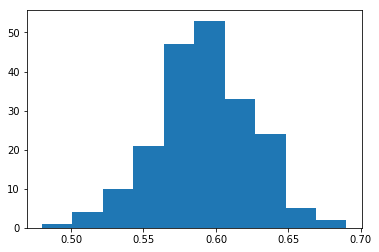

In [8]:
plt.hist(boot_sample);

In [9]:
boot_sample = pd.DataFrame([])
for i in np.arange(100):
    coffee_white = coffee_full[['drinks_coffee', 'height']].sample(200, replace=True)\
                   .query('drinks_coffee == False').iloc[0]
    boot_sample = pd.concat([boot_sample, coffee_white], axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [11]:
boot =(boot_sample.T)['height']
boot.mean()

66.34347719736769

In [12]:
np.percentile(boot, 0.025), np.percentile(boot, 0.975)

(59.93826276891755, 59.97583446165254)

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.jfdjqvcu4.png)
![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.rhe55a635js.png)
![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.jnvakhssphg.png)
![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.sjllq8179ho.png)

# 均数差 Difference In Means

在这个视频中，你为喝咖啡人群和不喝咖啡人群平均高度的差异，构建了置信区间。这个区间置信度为 95%。由于差异不能不含 0，因此建议与不喝咖啡人群相比，喝咖啡的总体平均高度确实存在差异。 

具体说来，在给定区间 0.59 至 2.37 英寸之间， 与不喝咖啡人群相比，喝咖啡人群的平均高度差异，可信度为 95% 。 

注意你构建的最后一个置信区间中措辞的相似度。高亮部分表示可以改变你结论的两部分： 

- 置信度。 

- 你在区间中采集的参数。 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('datasets/coffee_dataset.csv')
sample_data = full_data.sample(200)
sample_data.columns

Index(['user_id', 'age', 'drinks_coffee', 'height'], dtype='object')

`1.` 对于10,000次迭代，自助法（bootstrap）会对你的样本数据进行抽样，计算喝咖啡和不喝咖啡的人的平均身高的差异。使用你的抽样分布建立一个99％的置信区间。根据你的区间开始回答下面的第一个测试题目。

`2.` 对于10,000次迭代，自助法会对样本数据进行抽样，计算21岁以上和21岁以下的平均身高的差异。使用你的抽样分布构建一个99％的置信区间。根据你的区间来完成回答下面的第一个测试题目。

`3.` 对于10,000次迭代，自助法会对你的样本数据进行抽样，计算出21岁 **以下** 个体的喝咖啡的人的平均身高和不喝咖啡的人的平均身高之间的 **差异** 。使用你的抽样分布，建立一个95％的置信区间。根据你的区间来回答下面的第二个测试题目。

`4.` 对于10,000次迭代，自助法会对你的样本数据进行抽样，计算出21岁 **以上** 个体的喝咖啡的人的平均身高和不喝咖啡的人的平均身高之间的 **差异** 。使用你的抽样分布，建立一个95％的置信区间。根据你的区间来回答下面的第二个测试题目以及下列问题。

In [14]:
#  1
bootsample = sample_data.sample(200, replace=True)
mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
mean_nocoff = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
mean_coff - mean_nocoff

1.9732964788157545

In [15]:
bootsample.head()

,user_id,age,drinks_coffee,height
93,2423,>=21,True,69.540052
1239,4172,>=21,True,71.011189
1756,5529,>=21,True,67.857414
879,2639,>=21,True,68.445535
944,4975,>=21,False,74.276003


In [16]:
diffs = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    mean_nocoff = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    diffs.append(mean_coff - mean_nocoff)

(array([  24.,  109.,  546., 1516., 2623., 2826., 1664.,  568.,  106.,
          18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <a list of 10 Patch objects>)

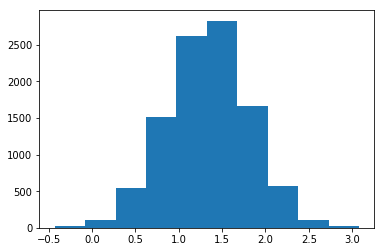

In [17]:
plt.hist(diffs)

In [18]:
np.percentile(diffs, .5), np.percentile(diffs, 99.5)

(0.10258900080921124, 2.538833370796657)

In [19]:
# 2
diffs_21 = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_beyond_21 = bootsample[bootsample.age == '>=21']['height'].mean()
    mean_under_21 = bootsample[bootsample.age == '<21']['height'].mean()
    diffs_21.append(mean_beyond_21 - mean_under_21)
    

(array([   8.,   47.,  329., 1196., 2589., 3084., 1902.,  714.,  117.,
          14.]),
 array([2.84743507, 3.11400025, 3.38056542, 3.64713059, 3.91369577,
        4.18026094, 4.44682611, 4.71339129, 4.97995646, 5.24652163,
        5.51308681]),
 <a list of 10 Patch objects>)

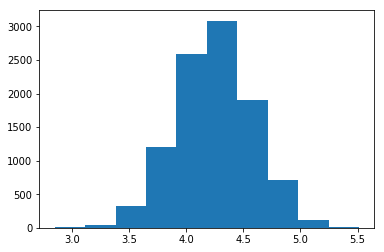

In [20]:
plt.hist(diffs_21)

In [21]:
np.percentile(diffs_21, 2.5), np.percentile(diffs_21, 97.5)

(3.5754196021207765, 4.8942324635943075)

In [22]:
diffs_21 = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_beyond_21 = bootsample[(bootsample.age == '>=21')&(bootsample.drinks_coffee == True)]['height'].mean()
    mean_under_21 = bootsample[(bootsample.age == '<21')&(bootsample.drinks_coffee == False)]['height'].mean()
    diffs_21.append(mean_beyond_21 - mean_under_21)

(array([  13.,   76.,  468., 1543., 2691., 2726., 1681.,  629.,  152.,
          21.]),
 array([1.89288625, 2.19030438, 2.48772252, 2.78514066, 3.0825588 ,
        3.37997694, 3.67739508, 3.97481321, 4.27223135, 4.56964949,
        4.86706763]),
 <a list of 10 Patch objects>)

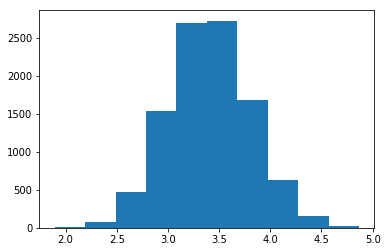

In [23]:
plt.hist(diffs_21)

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.1ubrutmhdc5.png)
![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.qb7dwya9bb.png)

# 置信区间的应用 

虽然你对比了喝咖啡人群与不喝咖啡人群的平均高度，有些其他应用也可以用于对比两组的平均数。 

A/B 测试对全球企业是最重要的内容之一。通过这个技巧，你可以改变网页布局的一些内容，了解它如何影响用户。理想情况下，你需要提供一个页面，可以实现更多点击量、更高收益和/或更高的用户满意度。





# 统计显著性与实际显著性 


字幕中现实意义应为**实际显著性——Practical significance**；统计意义应为**统计显著性——statistical significance** 

这里你掌握了 **实际** 和 **统计** 意义。 

使用置信区间和假设检验，你能够在做决策时提供 **统计显著性**。 

然而，做决策时考虑 **实际显著性** 同样很重要。 实际显著性 考虑到所处情况的其他因素，假设检验或置信空间的结果可能不会直接考虑到这种情况。**空间、时间 或 金钱** 等约束条件对商业决定很重要。但是可能不会在统计测试中直接考虑这些因素。

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.uhbiikiq0j8.png)

# 传统置信区间方法 
在这个视频中，你通过使用这堂课贯穿始终的自助法，构建 python，对比了计算均数差的传统方法。 

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.fm9ldxtzjop.png)

样本容量较大，最终相似性越高。对于较小的样本容量，使用传统方法可以产生区间不正确的设想。样本容量较小，也不适合自助法，因为可能会因为无法较好地展现整个总体，所以产生错误结果。 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

coffee_full = pd.read_csv('datasets/confidence_intervals_dataset/coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

**自助抽样法 置信区间**

In [19]:
diff = []

for _ in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    mean_coffee = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    mean_nocoffee = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    diff.append(mean_coffee - mean_nocoffee)
%time np.percentile(diff, 2.5), np.percentile(diff, 97.5)

CPU times: user 3.92 ms, sys: 0 ns, total: 3.92 ms
Wall time: 3.93 ms


(0.4061301359510232, 2.247567281041768)

**T检验的 传统嵌入法 置信区间**

In [18]:
import statsmodels.stats.api as sms

x1 = coffee_red[coffee_red['drinks_coffee'] == True]['height']
x2 = coffee_red[coffee_red['drinks_coffee'] == False]['height']

cm=sms.CompareMeans(sms.DescrStatsW(x1), sms.DescrStatsW(x2))
%time cm.tconfint_diff(usevar = 'unequal')

CPU times: user 636 µs, sys: 5 µs, total: 641 µs
Wall time: 511 µs


(0.39600106159185644, 2.273413157022891)

注意：自助抽样法和传统嵌入法的区间，几乎完全相同


# 置信区间的其他相关语言 


了解样本容量和置信度与最终分析后置信区间的关系，这是非常重要的。 

假设你可以控制分析中其他所有条目： 

- 增加样本容量，会降低置信区间的宽度。 

- 增加置信度 (如 95% 增加到 99%) 会增加置信区间的宽度。 

你注意到可以计算： 

- **置信区间** 宽度(The confidence interval width)，作为置信区间上限与下限的差异。 

- **误差范围** (The margin of error) 是置信区间宽度的一半，通过对样本估计值的加减，达到置信区间的最终结果。 

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.g2ryc1u26r.png)


![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.n8k2troqilq.png)
![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.w6qenc1jx1.png)

# 置信区间的正确解读 


## 置信区间 (和假设检验) 与机器学习 

置信区间采用综合方法，基于数据得出结论，因为这些测试旨在理解总体的参数 (即总体数值的集合)。 

另外，机器学习采用个别方法得出结论，因为通过每个单独数据点预测结果。 

在这个课程的最后一堂课中，你将会学习机器学习两种最基础的方法：**线性** 回归和 **逻辑** 回归。 

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.jrlvh0zo23.png)

# 总结 

在这节课中，你学习到了： 

1. 如何利用自助法和抽样分布的知识，创建任一总体参数的置信区间。 

2. 学习如何构建总体平均数和均数差的置信区间，但实际上可以对你感兴趣的任何参数采取相同过程。 

3. 学习如何使用 python 嵌入函数构建置信区间，不过这依赖于中心极限定理等假设。 

4. 学习 **统计意义** 和 **现实意义** 的区别。 

5. 最后学习了置信区间的其他相关语言，如 **误差范围** 和 **置信区间宽度**，以及如何正确解读置信区间。记住，置信区间是针对总体中的 参数，而不是针对个别观测。 

 
